En este archivo realizo el EDA de cada csv creado por moneda, trayendome el DF que contiene, fechas desde enero del 2020 hasta la actualidad, precio de cierre, capitalizacion de mercado y volumen del mercado (la cantidad de una criptomoneda que se ha comprado y vendido en todos los intercambios en el dia)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()


## BITCOIN ##

* Es la primer criptomoneda
+ Bitcoin es una criptomoneda descentralizada presentada originalmente en un documento técnico en 2008 por una persona, o grupo de personas, utilizando el alias Satoshi Nakamoto. Se lanzó poco después, en enero de 2009.
* El bitcoin es una moneda en línea peer-to-peer, lo que significa que todas las transacciones ocurren directamente entre los participantes, iguales e independientes, de la red sin la necesidad de que ningún intermediario les de permiso o les facilite las operaciones.
* Se creo con el fin de que los pagos en línea se pudieran enviar directamente de una parte a otra sin pasar por una institución financiera
+ La cantidad total de Bitcoin está limitada a 21 millones de monedas, lo que crea un ambiente propicio para la escasez y la valorización a medida que aumenta la demanda.

In [15]:
bitcoin= pd.read_csv(r'C:\Users\flori\Desktop\DATA SCIENCE\LABS\Trabajos\tp2\Proyecto2_Data_Analytics\ETL\bitcoin.csv')

In [16]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1327 entries, 0 to 1326
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FECHAS          1327 non-null   object 
 1   PRECIO-usd      1327 non-null   float64
 2   MARKET_CAP-usd  1327 non-null   float64
 3   TOTAL_VOLUMES   1327 non-null   float64
 4   COIN_ID         1327 non-null   object 
dtypes: float64(3), object(2)
memory usage: 52.0+ KB


In [17]:
bitcoin.describe()

,PRECIO-usd,MARKET_CAP-usd,TOTAL_VOLUMES
count,1327.000000,1.327000e+03,1.327000e+03
mean,28477.504485,5.382454e+11,3.268600e+10
std,15680.744061,2.953907e+11,1.768263e+10
min,5032.501351,9.196280e+10,3.355039e+09
25%,16539.799859,3.179595e+11,2.087984e+10
50%,26824.101500,5.196677e+11,2.893694e+10
75%,40052.346803,7.563333e+11,4.032049e+10
max,67617.015545,1.278798e+12,1.788941e+11


Aca tenemos el analisis estadistico de los valores historicos de precio desde enero del 2020 a la actualidad. Podemos ver que el promedio es 28477, similar al valor actual que ronda alrededor de los 26 mil y tiene un minimo de 5 mil un un maximo de 67mil. Tambien podemos ver market cap y volumen de intercambio.

In [18]:
#transformo a date time las fechas
bitcoin['FECHAS']=pd.to_datetime(bitcoin['FECHAS'])

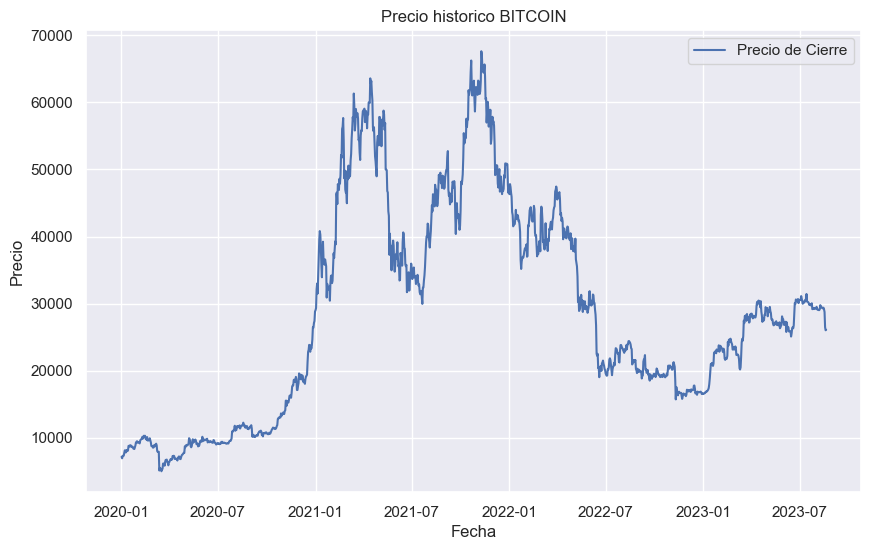

In [6]:

plt.figure(figsize=(10, 6))
plt.plot(bitcoin['FECHAS'], bitcoin['PRECIO-usd'], label='Precio de Cierre')
plt.title('Precio historico BITCOIN')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

En este grafico podemos ver que al inicio del 2020 el crecimiendo de bitcoin fue mas estable y al inicio del 2021 vemos como comienza un pico mas elevado de crecimiento de precio, acercandose casi a tu valor historico maximo, luego a medidados del 2021 baja y vuelve a subir para fines del 2021. Comienza luego a estabilizarse y caer nuevamente en 2022. 

Como ocurrió en muchos aspectos, el inicio de la pandemia también tuvo un impacto negativo en el BTC, haciéndolo caer a los 6,483.72 USD por BTC en marzo de ese año.

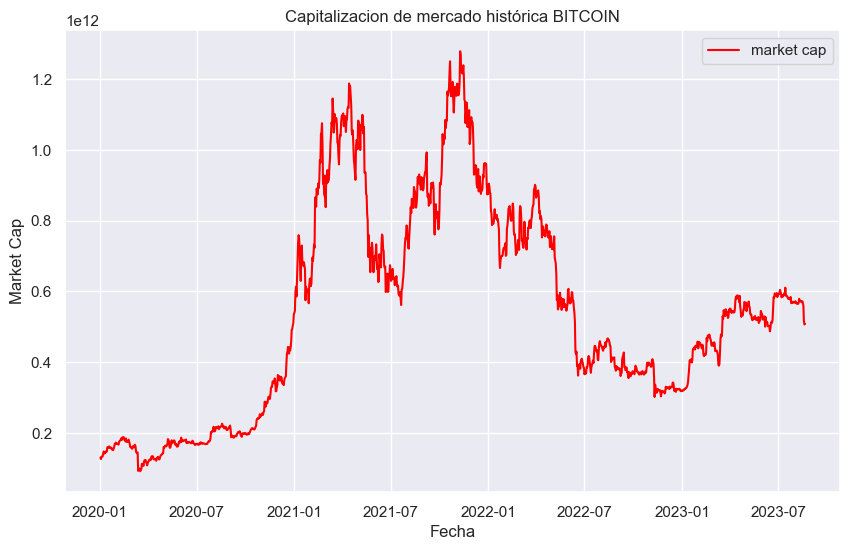

In [35]:

plt.figure(figsize=(10, 6))
plt.plot(bitcoin['FECHAS'], bitcoin['MARKET_CAP-usd'], label='market cap', color='red')
plt.title('Capitalizacion de mercado histórica BITCOIN')
plt.xlabel('Fecha')
plt.ylabel('Market Cap')
plt.legend()
plt.grid(True)
plt.show()

Podemos ver en este grafico que la capitalizacion de mercado, como tiene una relacion directa positiva con el precio de la moneda fue tambien siguiendo los movimientos del precio

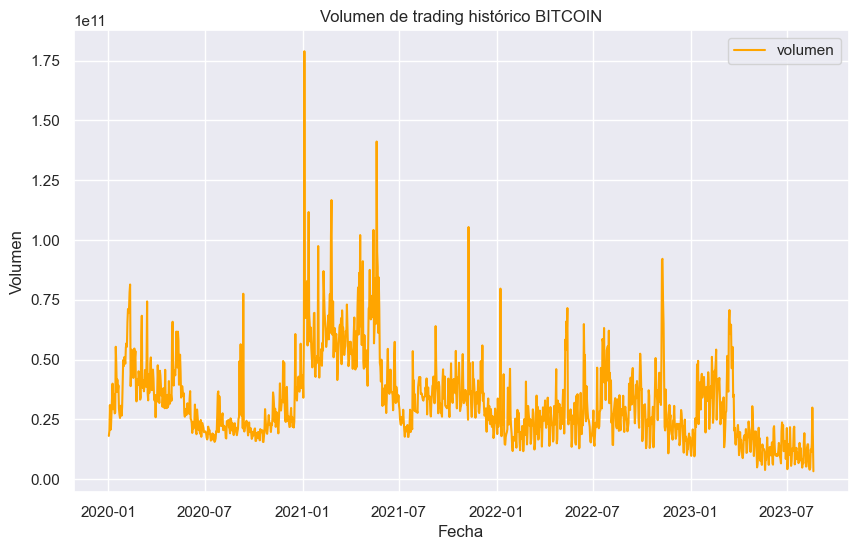

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(bitcoin['FECHAS'], bitcoin['TOTAL_VOLUMES'], label='volumen', color='orange')
plt.title('Volumen de trading histórico BITCOIN')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.legend()
plt.grid(True)
plt.show()

En este grafico podemos ver la variacion en el volumen de traiding de la bitcoin, y donde justamente podemos ver que los picos de mayor traiding estan relacionados con los cambios mas drasticos de precio. 

### RSI

* El RSI es un indicador de "momentum" que manifiesta si un activo está sobrecomprado o sobrevendido. 
* Lo hace midiendo la magnitud de los cambios de precio recientes (la configuración estándar son los 14 periodos previos –es decir, 14 días). 
* Muestra el ritmo (momentum) al que el precio está cambiando. Esto significa que, si el "momentum" se incrementa mientras el precio sube, la tendencia al alza es fuerte y cada vez más compradores están entrando. Por el contrario, si el "momentum" se reduce mientras el precio sube, podría indicar que pronto los vendedores se harán con el control del mercado.
* Una interpretación tradicional del RSI dice que por encima de 70 un activo está sobrecomprado, mientras que por debajo de 30 está sobrevendido. 

In [37]:
from ta.momentum import RSIIndicator

# Calcular RSI
rsi_period = 14  # Período típico para RSI
indicator = RSIIndicator(bitcoin['PRECIO-usd'], window=rsi_period)
bitcoin['RSI'] = indicator.rsi()

bitcoin.tail()

,FECHAS,PRECIO-usd,MARKET_CAP-usd,TOTAL_VOLUMES,COIN_ID,RSI
1322,2023-08-16,29170.490397,5.674983e+11,1.152340e+10,bitcoin,44.707455
1323,2023-08-17,28754.197021,5.599826e+11,1.480998e+10,bitcoin,38.069454
1324,2023-08-18,26501.587270,5.160269e+11,2.996559e+10,bitcoin,20.410125
1325,2023-08-19,26042.838257,5.068158e+11,1.806235e+10,bitcoin,18.525435
1326,2023-08-20,26104.778631,5.080877e+11,3.355039e+09,bitcoin,19.604897


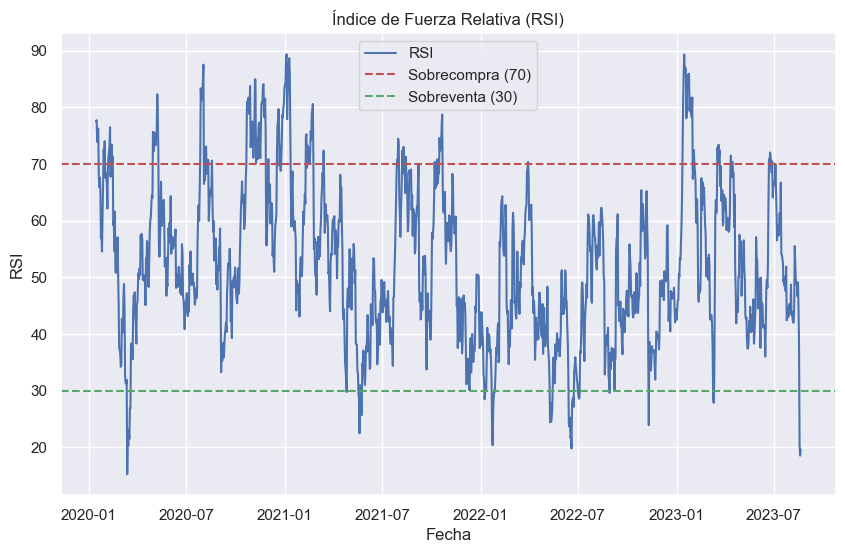

In [38]:
# Graficar el RSI
plt.figure(figsize=(10, 6))
plt.plot(bitcoin['FECHAS'], bitcoin['RSI'], label='RSI')
plt.axhline(y=70, color='r', linestyle='--', label='Sobrecompra (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Sobreventa (30)')
plt.title('Índice de Fuerza Relativa (RSI)')
plt.xlabel('Fecha')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

En este grafico podemos ver lo explicado mas arriba, y si lo relacionamos con los cambios en el precio podemos tener en cuanta que en 2020 cuando los valores eran mas bajos, el RSI nos indica que habia una sobreventa del activo en cambio cuando comienza a subir el precio en 2021 hay una sobrecompra. Y asi se repite con el resto de los periodos. Al mostrarnos esto podemos tambien predecir a corto plazo usando el RSI si se viene algun cambio mas significativo en el precio. 


## MEDIA MOVIL

* Una media móvil suaviza la acción del precio al filtrar el "ruido" del mercado y resaltar la dirección de la tendencia. Dado que se basa en datos del precio pasados, se considera un indicador atrasado.

* Cuanto más largo sea el periodo, mayor será el atraso. Por lo tanto, la SMA de 200 días reaccionará de forma más lenta a la acción del precio reciente que la SMA de 50 días.

* Los traders a menudo utilizan la relación del precio con determinadas medias móviles para evaluar la tendencia actual del mercado.


In [19]:
rolling_window = 50
bitcoin['MovingAverage'] = bitcoin['PRECIO-usd'].rolling(window=rolling_window).mean()


bitcoin.head()

,FECHAS,PRECIO-usd,MARKET_CAP-usd,TOTAL_VOLUMES,COIN_ID,MovingAverage
0,2020-01-02,7193.754668,1.304230e+11,1.812352e+10,bitcoin,NaN
1,2020-01-03,6963.853354,1.262808e+11,2.031319e+10,bitcoin,NaN
2,2020-01-04,7300.346935,1.327663e+11,3.101578e+10,bitcoin,NaN
3,2020-01-05,7351.377053,1.334747e+11,2.061164e+10,bitcoin,NaN
4,2020-01-06,7349.972248,1.333890e+11,2.192922e+10,bitcoin,NaN


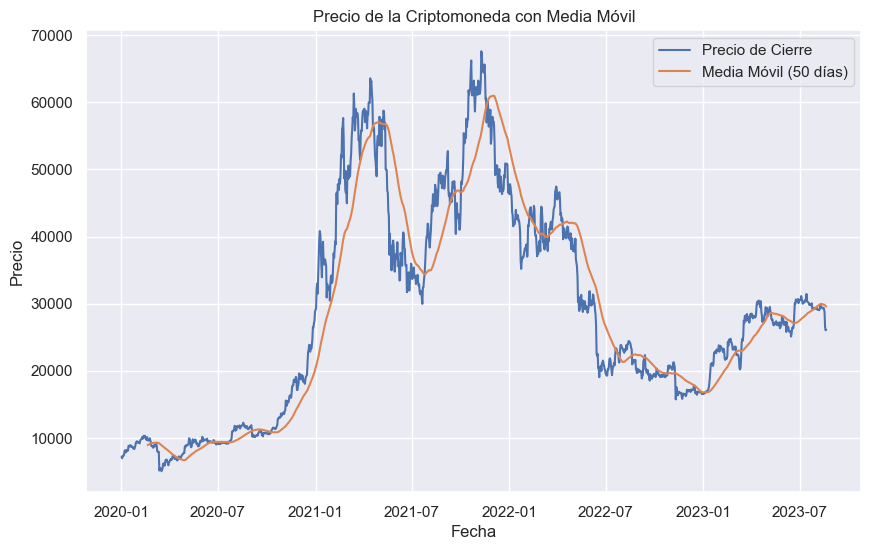

In [20]:
# Graficar los datos y la media móvil
plt.figure(figsize=(10, 6))
plt.plot(bitcoin['FECHAS'], bitcoin['PRECIO-usd'], label='Precio de Cierre')
plt.plot(bitcoin['FECHAS'], bitcoin['MovingAverage'], label=f'Media Móvil ({rolling_window} días)')
plt.title('Precio de la Criptomoneda con Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
bitcoin

,FECHAS,PRECIO-usd,MARKET_CAP-usd,TOTAL_VOLUMES,COIN_ID,RSI,MovingAverage
0,2020-01-02,7193.754668,1.304230e+11,1.812352e+10,bitcoin,NaN,NaN
1,2020-01-03,6963.853354,1.262808e+11,2.031319e+10,bitcoin,NaN,NaN
2,2020-01-04,7300.346935,1.327663e+11,3.101578e+10,bitcoin,NaN,NaN
3,2020-01-05,7351.377053,1.334747e+11,2.061164e+10,bitcoin,NaN,NaN
4,2020-01-06,7349.972248,1.333890e+11,2.192922e+10,bitcoin,NaN,NaN
...,...,...,...,...,...,...,...
1322,2023-08-16,29170.490397,5.674983e+11,1.152340e+10,bitcoin,44.707455,29302.643721
1323,2023-08-17,28754.197021,5.599826e+11,1.480998e+10,bitcoin,38.069454,29280.341372
1324,2023-08-18,26501.587270,5.160269e+11,2.996559e+10,bitcoin,20.410125,29139.715866
1325,2023-08-19,26042.838257,5.068158e+11,1.806235e+10,bitcoin,18.525435,28974.020392


In [81]:
bitcoin.to_csv('bitcoinDB.csv', index= False)